In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../benchmarks/results_cpu_all_omp_static_bak.csv')
df['n_organisms'] = df['grid_width'] * df['grid_height']
df

,n_threads,grid_width,grid_height,mutation_rate,genome_size,time,n_organisms
0,8,32,32,0.000100,500,129642,1024
1,8,32,32,0.000010,500,102187,1024
2,8,32,32,0.000001,500,108698,1024
3,8,128,128,0.000100,500,1251023,16384
4,8,128,128,0.000010,500,733281,16384
...,...,...,...,...,...,...,...
484,2,512,512,0.000010,5000,183930646,262144
485,2,512,512,0.000001,5000,56017711,262144
486,2,32,32,0.000100,50000,29468702,1024
487,2,32,32,0.000010,50000,10439525,1024


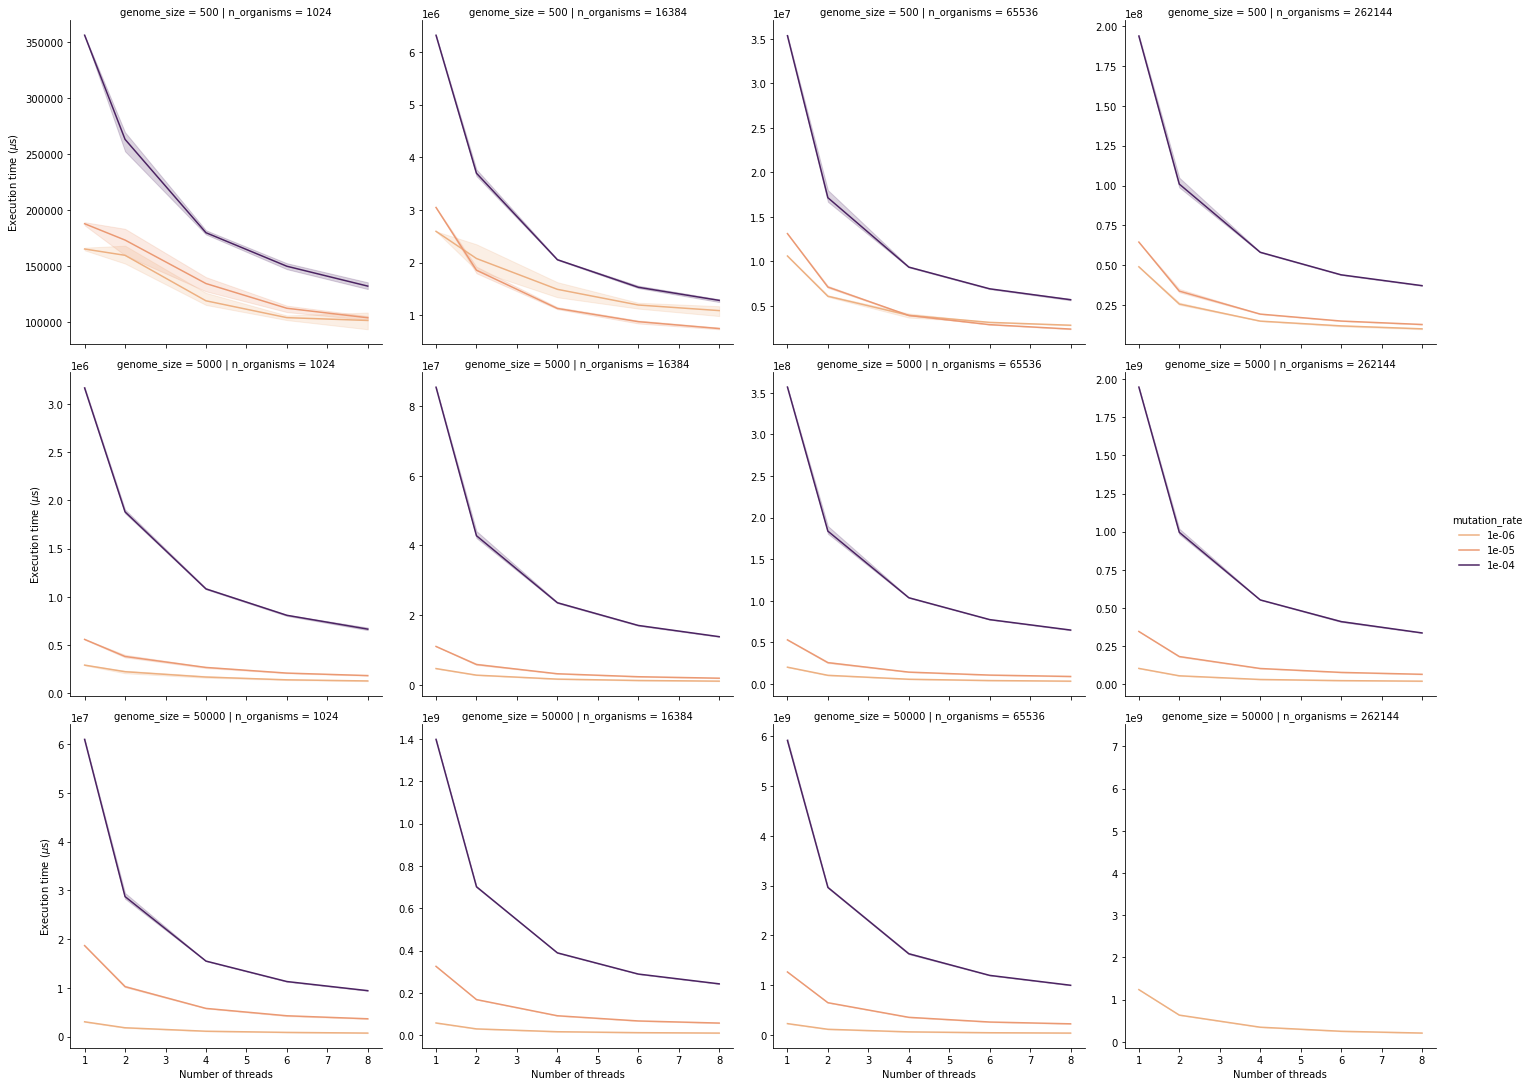

In [3]:
fig = sns.relplot(data=df, x="n_threads", y="time", hue="mutation_rate", col="n_organisms", kind="line", row="genome_size", legend="full", facet_kws={'sharey': False}, palette='flare')
fig.set_xlabels("Number of threads")
fig.set_ylabels("Execution time ($\mu$s)")

# fix mix of scientific and decimal notation 
for legend in fig._legend.texts:
    legend.set_text( f'{float(legend.get_text()):.0e}')

plt.show(fig)
fig.savefig('img/benchmark_omp_static.pdf')

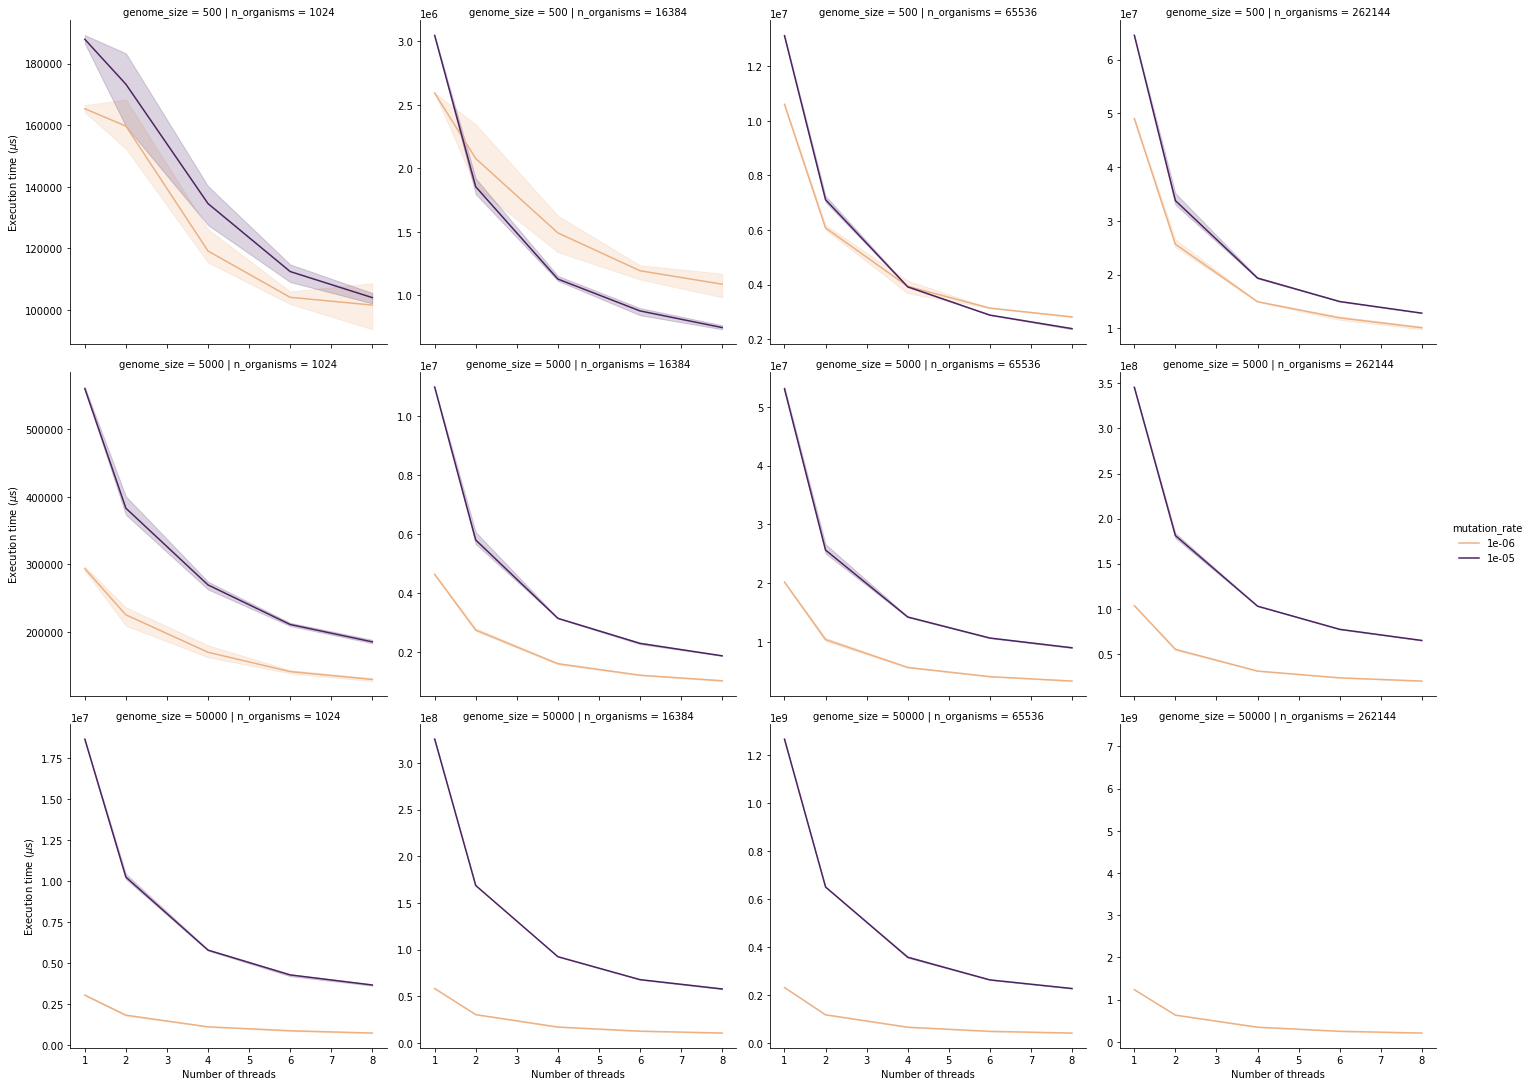

In [4]:
df_small = df[df["mutation_rate"] != 1e-4]
fig = sns.relplot(data=df_small, x="n_threads", y="time", hue="mutation_rate", col="n_organisms", kind="line", row="genome_size", legend="full", facet_kws={'sharey': False}, palette='flare')
fig.set_xlabels("Number of threads")
fig.set_ylabels("Execution time ($\mu$s)")

# fix mix of scientific and decimal notation 
for legend in fig._legend.texts:
    legend.set_text( f'{float(legend.get_text()):.0e}')

plt.show(fig)
fig.savefig('img/benchmark_omp_static_small.pdf')